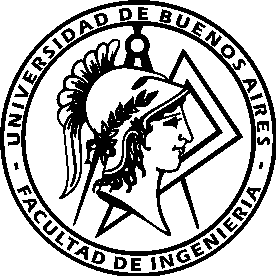

# Análisis Numérico (75.12/95.04) : Trabajo Práctico 2 - Ecuaciones diferenciales
## Curso: Sassano

### Integrantes:
- **Valfre Franco** (105607)
- **Domínguez Santiago** (110010)
- **Aroa Alexia** (110014)

##Objetivos
El objetivo principal de este trabajo práctico es analizar el comportamiento en el tiempo de un péndulo compuesto por
una masa, un hilo inextensible sumergido en un medio con rozamiento, mediante el uso de ecuaciones diferenciales.

# Discretización a través del método de Runge-Kutta

Dado el PVI

\begin{cases}
  \large\ddot{\theta} + \frac{b}{m}\dot{\theta} + \frac{g}{l}sen(\theta) = 0 \\
  \large {\theta}(t_0) = {\theta_0}\\
  \large\dot{\theta}(t_0) = \dot{\theta_0}\\
    \end{cases}

Hacemos un cambio de variables para transformar el problema a un sistema de ecuaciones diferenciales de primer orden

\begin{cases}
  \large \dot{\theta} = u  \\
  \large \ddot{\theta} = u' => u' = -\frac{b}{m}u - \frac{g}{l}sen(θ)\\
    \end{cases}

Cambiamos las condiciones iniciales

\begin{cases}
  \large\ {\theta}(t_0) = {\theta}_0  \\
  \large\ u(t_0) = u_0\\
    \end{cases}

Llegamos a un sistema de ecuaciones diferenciales de primer orden

\begin{cases}
  \large\ \dot{\theta} = f(t, u, {\theta}) = u  \\
  \large\ u' = g(t, u, {\theta}) =-\frac{b}{m}u - \frac{g}{l}sen(θ)\\
    \end{cases}



Para resolverlo empleamos el método de Runge-Kutta de segundo orden

\begin{cases}
  \large {\theta_{n+1}} = {\theta_n} + hk_2  \\
  \large u_{n+1} = u_n + hm_2\\
    \end{cases}

Donde las constantes $ k_2 $ y $ m_2 $ son

\begin{cases}
  \large k_1 = f(t_n, u_n, {\theta_n})  \\
  \large m_1 = g(t_n, u_n, {\theta_n}) \\
  \large k_2 = f(t_n + \frac{h}{2}, u_n + \frac{h*m1}{2}, {\theta_n} + \frac{h*k1}{2}) \\
  \large m_2 = g(t_n + \frac{h}{2}, u_n + \frac{h*m1}{2}, {\theta_n} + \frac{h*k1}{2})
    \end{cases}

Planteando un paso "genérico" obtenemos lo siguiente:

\begin{cases}
  \large k_1 = u_n  \\
  \large m_1 = -\frac{b}{m}u_n - \frac{g}{l}sen({\theta_n}) \\
  \large k_2 = u_n + \frac{h}{2}*(-\frac{b}{m}u_n - \frac{g}{l}sen({\theta_n})) \\
  \large m_2 = -\frac{b}{m}(u_n + \frac{h}{2}*(-\frac{b}{m}u_n - \frac{g}{l}sen({\theta_n}))) - \frac{g}{l}sen({\theta_n} + \frac{h}{2}*(u_n))
\end{cases}


Nos quedamos con:


\begin{cases}
  \large {\theta_{n+1}} = {\theta_n} + h*(u_n + \frac{h}{2}*(-\frac{b}{m}u_n - \frac{g}{l}sen({\theta_n}))) \\
  \large u_{n+1} = u_n + h*(-\frac{b}{m}(u_n + \frac{h}{2}*(-\frac{b}{m}u_n - \frac{g}{l}sen({\theta_n}))) - \frac{g}{l}sen({\theta_n} + \frac{h}{2}*(u_n)))\\
    \end{cases}


# Resolvemos dos avances con un paso de 0.1

Al ser un método numérico, los pasos por si solos no tienen mucha diferencia, solamente es aplicar el método con los valores anteriores

Primero paso:

\begin{cases}
  \large {\theta_1} = {\theta_0} + 0.1*(u_0 + 0.05*(-\frac{b}{m}u_0 - \frac{g}{l}sen({\theta_0}))) \\
  \large u_1 = u_0 + 0.1*(-\frac{b}{m}(u_0 + 0.05*(-\frac{b}{m}u_0 - \frac{g}{l}sen({\theta_0}))) - \frac{g}{l}sen({\theta_0} + 0.05*(u_0)))\\
    \end{cases}

Segundo paso:

  \begin{cases}
  \large {\theta_{2}} = {\theta_1} + 0.1*(u_1 + 0.05*(-\frac{b}{m}u_1 - \frac{g}{l}sen({\theta_1}))) \\
  \large u_2 = u_1 + 0.1*(-\frac{b}{m}(u_1 + 0.05*(-\frac{b}{m}u_1 - \frac{g}{l}sen({\theta_1}))) - \frac{g}{l}sen({\theta_1} + 0.05*(u_1)))\\
    \end{cases}

El problema está en expresar las variables $ \theta_1 $ y $ u_1 $ en el segundo paso en base a las condiciones iniciales

Obtenemos $ {\theta_2} $:

\begin{align}
  \small {\theta_{2}} = \left[{\theta_0} + 0.1*(u_0 + 0.05*(-\frac{b}{m}u_0 - \frac{g}{l}sen({\theta_0})))\right] + 0.1*\left[u_0 + 0.1*(-\frac{b}{m}(u_0 + 0.05*(-\frac{b}{m}u_0 - \frac{g}{l}sen({\theta_0}))) - \frac{g}{l}sen({\theta_0} + 0.05*(u_0)))\right] + 0.05*\left(-\frac{b}{m}\left[u_0 + 0.1*(-\frac{b}{m}(u_0 + 0.05*(-\frac{b}{m}u_0 - \frac{g}{l}sen({\theta_0}))) - \frac{g}{l}sen({\theta_0} + 0.05*(u_0)))\right] - \frac{g}{l}sen(\left[{\theta_0} + 0.1*(u_0 + 0.05*(-\frac{b}{m}u_0 - \frac{g}{l}sen({\theta_0})))\right])\right)
\end{align}

Y $ u_2 $:

\begin{align*}
  \small u_2 = \left[u_0 + 0.1*(-\frac{b}{m}(u_0 + 0.05*(-\frac{b}{m}u_0 - \frac{g}{l}sen({\theta_0}))) - \frac{g}{l}sen({\theta_0} + 0.05*(u_0)))\right] + 0.1*\left(-\frac{b}{m}\left[u_0 + 0.1*(-\frac{b}{m}(u_0 + 0.05*(-\frac{b}{m}u_0 - \frac{g}{l}sen({\theta_0}))) - \frac{g}{l}sen({\theta_0} + 0.05*(u_0)))\right] + 0.05*\left(-\frac{b}{m}\left[u_0 + 0.1*(-\frac{b}{m}(u_0 + 0.05*(-\frac{b}{m}u_0 - \frac{g}{l}sen({\theta_0}))) - \frac{g}{l}sen({\theta_0} + 0.05*(u_0)))\right] - \frac{g}{l}sen(\left[{\theta_0} + 0.1*(u_0 + 0.05*(-\frac{b}{m}u_0 - \frac{g}{l}sen({\theta_0})))\right])\right) - \frac{g}{l}sen(\left[{\theta_0} + 0.1*(u_0 + 0.05*(-\frac{b}{m}u_0 - \frac{g}{l}sen({\theta_0})))\right] + 0.05*\left[u_0 + 0.1*(-\frac{b}{m}(u_0 + 0.05*(-\frac{b}{m}u_0 - \frac{g}{l}sen({\theta_0}))) - \frac{g}{l}sen({\theta_0} + 0.05*(u_0)))\right])\right) \\
\end{align*}

# Preparar entorno

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Runge-Kutta de orden 4

In [ ]:
def rungeKutta4Orden(t, tEnd, x, y, h, f, g):
    valoresT = [t]
    valoresX = [x]
    valoresY = [y]

    while True:
        x, y = rungeKuttaSiguientePaso(np.round(t, 8), np.round(x, 8), np.round(y, 8), h, f, g)
        t += h
        t = np.round(t, 8)
        valoresT.append(t)
        valoresX.append(x)
        valoresY.append(y)

        if(t >= tEnd):
            break

    return valoresT, valoresX, valoresY


def rungeKuttaSiguientePaso(t, x, y, h, f, g):
    k1 = f(t, x, y)
    m1 = g(t, x, y)
    k2 = f(t + h / 2, x + k1 * h / 2, y + m1 * h / 2)
    m2 = g(t + h / 2, x + k1 * h / 2, y + m1 * h / 2)
    k3 = f(t + h / 2, x + k2 * h/ 2, y + m2 * h / 2)
    m3 = g(t + h / 2, x + k2 * h/ 2, y + m2 * h / 2)
    k4 = f(t + h, x + k3 * h, y + m3 * h)
    m4 = g(t + h, x + k3 * h, y + m3 * h)

    return x + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6, y + h * (m1 + 2 * m2 + 2 * m3 + m4) / 6

def f(t, x, y):
    return y

def g(t, x, y):
    return -B/M*y - G/L*np.sin(x)

# Generar gráficos

In [ ]:
def graficar(tiempo, posAngular, velAngular, titulo):
    plt.figure().set_figwidth(10)
    plt.plot(tiempo, np.rad2deg(velAngular), label='VelAngular', color="blue")
    plt.plot(tiempo, np.rad2deg(posAngular), label='PosAngular', color="red")

    plt.xlabel('t [s]')
    plt.ylabel(r"$ \theta [º] $          $ \theta' [º / s] $")
    plt.yticks(np.arange(-100, 120, 50))
    plt.title(titulo)
    plt.xticks(np.arange(0, 20, 2))
    plt.grid(True)
    plt.legend(loc=(1.04, 0))
    plt.show()

def crearGrafico(tInicial, tFinal, titulo, tiempoPorPaso, posAngularPorPaso, velAngularPorPaso):
    print("    t      |     Ángulo     |    Vel Angular")
    print("---------------------------------------------")
    for i in range(len(tiempoPorPaso)):
        if i < 6 or i > 94:
            if posAngularPorPaso[i] < 0:
                espacio= ""
                epacio_inverso = " "
            else:
                espacio= " "
                epacio_inverso = ""
            if velAngularPorPaso[i] < 0:
                espacio2= ""
            else:
                espacio2= " "
            print(f"    {np.round(tiempoPorPaso[i], 6):<4}   |  {espacio} {np.round(posAngularPorPaso[i], 6):<9}  {epacio_inverso} |{espacio2}   {np.round(velAngularPorPaso[i], 6):.8f}")

    print('\n')
    graficar(tiempoPorPaso, posAngularPorPaso, velAngularPorPaso, titulo)

# Resolvemos para el intervalo [0;0 ; 20;0]s

Armamos tablas y gráficos

In [ ]:
G = 9.81
B = 1
M = 1
L = 1

def g(t, x, y):
    return -B/M*y - G/L*np.sin(x)

## Sistema no amortiguado

######### Sistema no amortiguado ###########

    t      |     Ángulo     |    Vel Angular
---------------------------------------------
    0      |    0.523599    |    0.00000000
    0.2    |    0.428315    |   -0.92431400
    0.4    |    0.17571     |   -1.52407300
    0.6    |   -0.142463    |   -1.55691600
    0.8    |   -0.40701     |   -1.00878200
    1.0    |   -0.521507    |   -0.10504700
    19.0   |   -0.172995    |   -1.47037000
    19.2   |   -0.415713    |   -0.88415400
    19.4   |   -0.505243    |    0.01292900
    19.6   |   -0.410595    |    0.90500300
    19.8   |   -0.164778    |    1.47727000
    20.0   |    0.142581    |    1.49899400




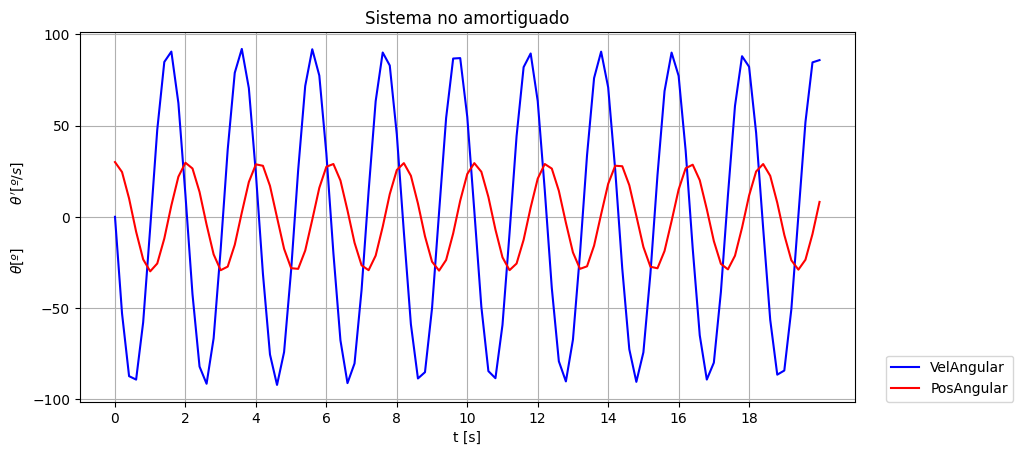

In [ ]:
def sistemaNoAmortiguado():
    # m, l, b, h, ángulo, velocidad angular
    return 0, 1, 1, np.radians(30), np.radians(0)

B, M, L, ANGULO_INICIAL, VELOCIDAD_ANGULAR_INICIAL = sistemaNoAmortiguado()
tiempoPorPaso, posAngularPorPaso, velAngularPorPaso = rungeKutta4Orden(0, 20, ANGULO_INICIAL, VELOCIDAD_ANGULAR_INICIAL, 0.2, f, g)

print("######### Sistema no amortiguado ###########\n")
crearGrafico(0, 20, "Sistema no amortiguado", tiempoPorPaso, posAngularPorPaso, velAngularPorPaso)

## Sistema con amortiguamiento subcrítico


########## Sistema amortiguado #############

    t      |     Ángulo     |    Vel Angular
---------------------------------------------
    0      |    0.523599    |    1.74532900
    0.2    |    0.74562     |    0.44043200
    0.4    |    0.699896    |   -0.86452200
    0.6    |    0.425024    |   -1.79449700
    0.8    |    0.0288      |   -2.04208800
    1.0    |   -0.339874    |   -1.53903700
    19.0   |    8.8e-05     |   -0.02149800
    19.2   |   -0.003753    |   -0.01579600
    19.4   |   -0.005875    |   -0.00494500
    19.6   |   -0.005677    |    0.00665500
    19.8   |   -0.003452    |    0.01474900
    20.0   |   -0.000195    |    0.01675700




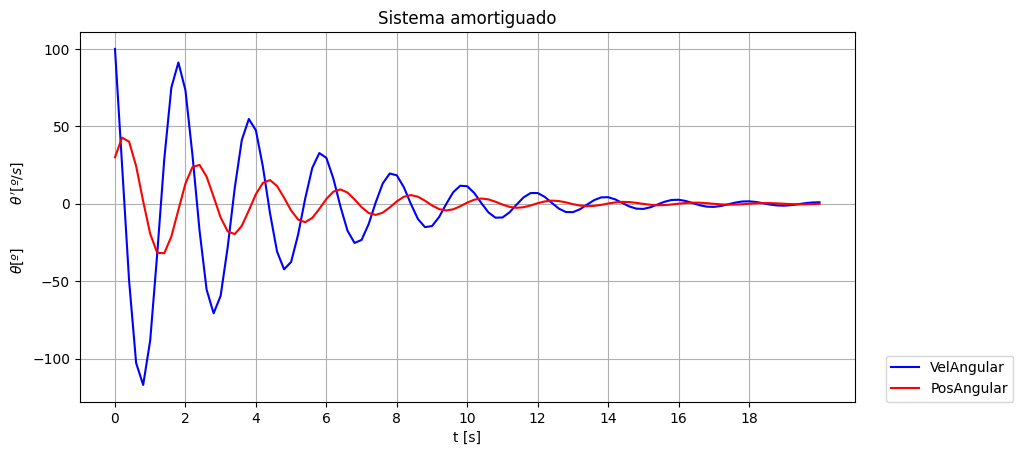

In [ ]:
def sistemaAmortiguado():
    # m, l, b, h, ángulo, velocidad angular
    return 0.5, 1, 1, np.radians(30), np.radians(100)

B, M, L, ANGULO_INICIAL, VELOCIDAD_ANGULAR_INICIAL = sistemaAmortiguado()
tiempoPorPaso, posAngularPorPaso, velAngularPorPaso = rungeKutta4Orden(0, 20, ANGULO_INICIAL, VELOCIDAD_ANGULAR_INICIAL, 0.2, f, g)

print("\n########## Sistema amortiguado #############\n")
crearGrafico(0, 20, "Sistema amortiguado", tiempoPorPaso, posAngularPorPaso, velAngularPorPaso)
